In [ ]:
!python --version

Python 3.10.12


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
precip_df = pd.read_csv('/content/gdrive/MyDrive/Theses_Landslides/Data/GLC_Dataset/GLCprecipitationdata.csv')

In [ ]:
precip_df.head()

,Landslide_date,latitude,longitude,precip_30d,precip_60d,landslide_trigger
0,2008-08-01,32.5625,107.4500,214.825043,337.946442,rain
1,2009-01-02,45.4200,-122.6630,86.834053,86.834053,downpour
2,2007-01-19,-11.1295,-75.3587,104.967728,104.967728,downpour
3,2009-07-31,28.8378,81.7080,436.084320,592.209167,monsoon
4,2010-10-16,10.3336,123.8978,231.278992,543.187256,tropical_cyclone


In [ ]:
triggers_rainfall = ['rain','downpour','monsoon','tropical_cyclone','continuous_rain']

In [ ]:
precip_df['landslide_trigger'] = precip_df['landslide_trigger'].apply(lambda x: 1 if x in triggers_rainfall else 0)

In [ ]:
precip_df['landslide_trigger'].unique()

array([1, 0])

In [ ]:
precip_df['is_rainfall_induced'] = ((precip_df['precip_30d']>150.00) & (precip_df['precip_60d']>200.00) & (precip_df['landslide_trigger']==1)).astype(int)

In [ ]:
precip_df.head()

,Landslide_date,latitude,longitude,precip_30d,precip_60d,landslide_trigger,is_rainfall_induced
0,2008-08-01,32.5625,107.4500,214.825043,337.946442,1,1
1,2009-01-02,45.4200,-122.6630,86.834053,86.834053,1,0
2,2007-01-19,-11.1295,-75.3587,104.967728,104.967728,1,0
3,2009-07-31,28.8378,81.7080,436.084320,592.209167,1,1
4,2010-10-16,10.3336,123.8978,231.278992,543.187256,1,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

Converting Landslide date and extracting temporal feaures.

In [ ]:
precip_df['Landslide_date'] = pd.to_datetime(precip_df['Landslide_date'])
precip_df['Landslide_day_of_year'] = precip_df['Landslide_date'].dt.dayofyear
precip_df['Landslide_month'] = precip_df['Landslide_date'].dt.month

In [ ]:
precip_df.head()

,Landslide_date,latitude,longitude,precip_30d,precip_60d,landslide_trigger,is_rainfall_induced,Landslide_day_of_year,Landslide_month
0,2008-08-01,32.5625,107.4500,214.825043,337.946442,1,1,214,8
1,2009-01-02,45.4200,-122.6630,86.834053,86.834053,1,0,2,1
2,2007-01-19,-11.1295,-75.3587,104.967728,104.967728,1,0,19,1
3,2009-07-31,28.8378,81.7080,436.084320,592.209167,1,1,212,7
4,2010-10-16,10.3336,123.8978,231.278992,543.187256,1,1,289,10


In [ ]:
sc = MinMaxScaler()

In [ ]:
precip_df[['precip_30d', 'precip_60d']] = sc.fit_transform(precip_df[['precip_30d', 'precip_60d']])
precip_df[['latitude', 'longitude']] = sc.fit_transform(precip_df[['latitude', 'longitude']])

In [ ]:
precip_df.head()

,Landslide_date,latitude,longitude,precip_30d,precip_60d,landslide_trigger,is_rainfall_induced,Landslide_day_of_year,Landslide_month
0,2008-08-01,0.664454,0.798481,0.132331,0.117270,1,1,214,8
1,2009-01-02,0.772136,0.159228,0.053489,0.030132,1,0,2,1
2,2007-01-19,0.298531,0.290639,0.064660,0.036425,1,0,19,1
3,2009-07-31,0.633259,0.726970,0.268626,0.205501,1,1,212,7
4,2010-10-16,0.478286,0.844172,0.142467,0.188490,1,1,289,10


In [ ]:
sc_dt = MinMaxScaler()
precip_df[['Landslide_day_of_year', 'Landslide_month']] = sc_dt.fit_transform(precip_df[['Landslide_day_of_year', 'Landslide_month']])

In [ ]:
precip_df.head()

,Landslide_date,latitude,longitude,precip_30d,precip_60d,landslide_trigger,is_rainfall_induced,Landslide_day_of_year,Landslide_month
0,2008-08-01,0.664454,0.798481,0.132331,0.117270,1,1,0.583562,0.636364
1,2009-01-02,0.772136,0.159228,0.053489,0.030132,1,0,0.002740,0.000000
2,2007-01-19,0.298531,0.290639,0.064660,0.036425,1,0,0.049315,0.000000
3,2009-07-31,0.633259,0.726970,0.268626,0.205501,1,1,0.578082,0.545455
4,2010-10-16,0.478286,0.844172,0.142467,0.188490,1,1,0.789041,0.818182


In [ ]:
def createseq(data, X_features,y_target, seqlen):
    seq = []
    lab = []
    for i in range(len(data) - seqlen):
        sfeatures = data[X_features].iloc[i:i+seqlen].values
        slabel = data[y_target].iloc[i + seqlen - 1]
        seq.append(sfeatures)
        lab.append(slabel)
    return np.array(seq), np.array(lab)

In [ ]:
BiLstm_features = ['latitude', 'longitude', 'precip_30d', 'precip_60d']
BiLstm_target = 'is_rainfall_induced'
BiLstm_sequence_length = 60

In [ ]:
X_features, y_target = createseq(precip_df,BiLstm_features,BiLstm_target,BiLstm_sequence_length)

In [ ]:
seq_features_30, target_30 = createseq(precip_df,BiLstm_features,BiLstm_target,seqlen=30)

In [ ]:
seq_features_60, target_60 = createseq(precip_df,BiLstm_features,BiLstm_target,seqlen=60)

In [ ]:
len(seq_features_30)

10934

In [ ]:
len(seq_features_60)

10904

In [ ]:
records_min = min(len(seq_features_60),len(seq_features_30),len(target_30),len(target_60))

In [ ]:
records_min

10904

In [ ]:
seq_features_30=seq_features_30[:records_min]

In [ ]:
len(seq_features_30)

10904

In [ ]:
seq_features_60=seq_features_60[:records_min]

In [ ]:
len(seq_features_60)

10904

In [ ]:
len(target_30)

10934

In [ ]:
target_30 = target_30[:records_min]

In [ ]:
len(target_30)

10904

In [ ]:
target_60 = target_60[:records_min]

In [ ]:
len(target_60)

10904

In [ ]:
X_features = np.concatenate([seq_features_30,seq_features_60],axis=1) # on the features axis

In [ ]:
len(X_features)

10904

In [ ]:
y_target=target_30[:records_min]

In [ ]:
len(y_target)

10904

In [ ]:
X_features

array([[[6.64453700e-01, 7.98480610e-01, 1.32331433e-01, 1.17270084e-01],
        [7.72135880e-01, 1.59228343e-01, 5.34894561e-02, 3.01321020e-02],
        [2.98531100e-01, 2.90639350e-01, 6.46597327e-02, 3.64246303e-02],
        ...,
        [7.70573934e-01, 1.57851292e-01, 8.47512076e-02, 5.39801609e-02],
        [2.00016713e-01, 3.80325742e-01, 3.42189935e-01, 2.26645822e-01],
        [6.03712519e-01, 7.62456006e-01, 1.85442448e-01, 1.83103702e-01]],

       [[7.72135880e-01, 1.59228343e-01, 5.34894561e-02, 3.01321020e-02],
        [2.98531100e-01, 2.90639350e-01, 6.46597327e-02, 3.64246303e-02],
        [6.33259158e-01, 7.26969518e-01, 2.68626331e-01, 2.05501257e-01],
        ...,
        [2.00016713e-01, 3.80325742e-01, 3.42189935e-01, 2.26645822e-01],
        [6.03712519e-01, 7.62456006e-01, 1.85442448e-01, 1.83103702e-01],
        [6.98742822e-01, 7.07948323e-01, 4.23681282e-05, 8.77552372e-04]],

       [[2.98531100e-01, 2.90639350e-01, 6.46597327e-02, 3.64246303e-02],
        

In [ ]:
y_target

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
import matplotlib.pyplot as plt

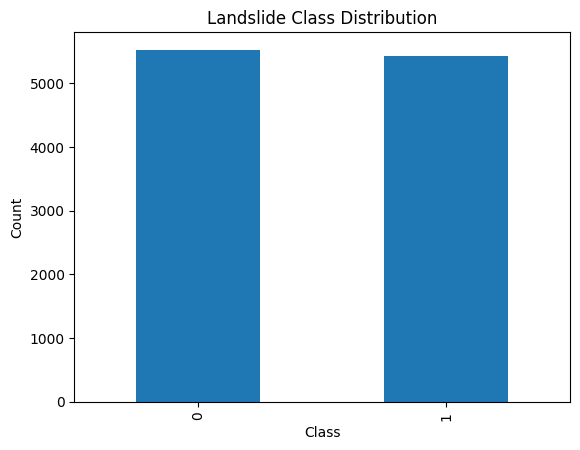

In [ ]:
precip_df['is_rainfall_induced'].value_counts().plot(kind='bar')
plt.title('Landslide Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
class_counts = precip_df['is_rainfall_induced'].value_counts()
print(class_counts)
imbalance_ratio = 1-(class_counts.min() / class_counts.sum())
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}")

is_rainfall_induced
0    5527
1    5437
Name: count, dtype: int64
Class Imbalance Ratio: 0.50


In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X_features.reshape(X_features.shape[0], -1), y_target)
X_sampled = X_sampled.reshape(X_sampled.shape[0], -1, len(BiLstm_features))

In [ ]:
print("Shape of X:", X_sampled.shape)
print("Shape of y:", y_sampled.shape)

Shape of X: (11000, 60, 4)
Shape of y: (11000,)


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tssplit = TimeSeriesSplit(n_splits=5)

In [ ]:
!pip install tensorflow

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Bidirectional,LSTM,Dense,Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lrate = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.000001)

In [ ]:
history=None

**1. Running with TPU configuration -BiLSTM + Sampling - as issue with deserialization when tried to load model due keras**

In [ ]:
epochs=50
batch_size=32

In [ ]:
for train_i, val_i in tssplit.split(X_sampled, y_sampled):
    X_train, X_val = X_sampled[train_i], X_sampled[val_i]
    y_train, y_val = y_sampled[train_i], y_sampled[val_i]

    mlstm= Sequential()

    mlstm.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))

    mlstm.add(Dropout(0.3))

    mlstm.add(Bidirectional(LSTM(32)))

    mlstm.add(Dense(1, activation='sigmoid'))

    mlstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

    mlstm.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=epochs,batch_size=batch_size,callbacks=[earlystopping, lrate])

    val_loss, val_accuracy, val_precision, val_recall, val_auc = mlstm.evaluate(X_val, y_val)

    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}, Validation Precision: {val_precision},Validation Recall: {val_recall}, Validation AUC: {val_auc} ")

Epoch 1/50
58/58 [==============================] - 13s 126ms/step - loss: 0.6856 - accuracy: 0.5559 - precision: 0.5442 - recall: 0.6370 - auc: 0.5804 - val_loss: 0.6525 - val_accuracy: 0.6754 - val_precision: 0.7395 - val_recall: 0.5378 - val_auc: 0.7544 - lr: 0.0010
Epoch 2/50
58/58 [==============================] - 5s 90ms/step - loss: 0.6186 - accuracy: 0.6469 - precision: 0.6485 - recall: 0.6271 - auc: 0.7172 - val_loss: 0.5476 - val_accuracy: 0.7316 - val_precision: 0.7172 - val_recall: 0.7612 - val_auc: 0.8117 - lr: 0.0010
Epoch 3/50
58/58 [==============================] - 6s 100ms/step - loss: 0.5522 - accuracy: 0.7193 - precision: 0.7039 - recall: 0.7481 - auc: 0.7962 - val_loss: 0.4924 - val_accuracy: 0.7747 - val_precision: 0.7741 - val_recall: 0.7733 - val_auc: 0.8474 - lr: 0.0010
Epoch 4/50
58/58 [==============================] - 6s 96ms/step - loss: 0.5070 - accuracy: 0.7591 - precision: 0.7425 - recall: 0.7866 - auc: 0.8334 - val_loss: 0.4680 - val_accuracy: 0.7681 -

Overall training Accuracy , validation accuracy, using  5-fold cross validation is as follows :
**creation of list was avoid due to computational power

In [ ]:
training_accuracy_Bilstm = (0.8707 + 0.9067 + 0.9062 + 0.9182 + 0.8827)  /5

In [ ]:
print("Training accuracy of Bilstm with Sampling",training_accuracy_Bilstm)

Training accuracy of Bilstm with Sampling 0.8969000000000001


In [ ]:
Validation_accuracy_Bilstm = (0.8707 + 0.9067 + 0.9061 + 0.9181 + 0.8827)  /5

In [ ]:
print("Validation accuracy of Bilstm with Sampling",Validation_accuracy_Bilstm)

Validation accuracy of Bilstm with Sampling 0.89686


In [ ]:
mlstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirecti  (None, 60, 128)           35328     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 60, 128)           0         
                                                                 
 bidirectional_9 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 76609 (299.25 KB)
Trainable params: 76609 (299.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mlstm.save('/content/gdrive/My Drive/Theses_Landslides/Models/BiLSTMMODEL/With_TPU/W_SAMPLING/BiLSTMModelV1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
mlstm.save('/content/gdrive/My Drive/Theses_Landslides/Models/BiLSTMMODEL/With_TPU/W_SAMPLING/BiLSTMModelV1.keras')

In [ ]:
mlstm.save_weights('/content/gdrive/My Drive/Theses_Landslides/Models/BiLSTMMODEL/With_TPU/W_SAMPLING/BiLSTMModelV1.weights.h5')

Running the Above lines before Bi-LSTM model creation and excecution to get data for other models to run.

**2. Running with TPU configuration -LSTM + Sampling - as issue with deserialization when tried to load model due keras**

In [ ]:
Lstm_epochs=50
Lstm_Batch_size=32

In [ ]:
for train_i, val_i in tssplit.split(X_sampled, y_sampled):
    X_train, X_val = X_sampled[train_i], X_sampled[val_i]
    y_train, y_val = y_sampled[train_i], y_sampled[val_i]

    mdlstm= Sequential()

    mdlstm.add(LSTM(64, activation='tanh',return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

    mdlstm.add(Dropout(0.2))

    mdlstm.add(Dense(1, activation='sigmoid'))

    mdlstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

    mdlstm.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=Lstm_epochs,batch_size=Lstm_Batch_size,callbacks=[earlystopping, lrate])

    val_loss, val_accuracy, val_precision, val_recall, val_auc = mdlstm.evaluate(X_val, y_val)

    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}, Validation Precision: {val_precision},Validation Recall: {val_recall}, Validation AUC: {val_auc} ")

Epoch 1/50
58/58 [==============================] - 5s 53ms/step - loss: 0.6882 - accuracy: 0.5477 - precision_5: 0.5446 - recall_5: 0.5303 - auc_5: 0.5660 - val_loss: 0.6784 - val_accuracy: 0.7321 - val_precision_5: 0.7269 - val_recall_5: 0.7404 - val_auc_5: 0.7969 - lr: 0.0010
Epoch 2/50
58/58 [==============================] - 2s 31ms/step - loss: 0.6686 - accuracy: 0.6414 - precision_5: 0.6384 - recall_5: 0.6370 - auc_5: 0.6895 - val_loss: 0.6444 - val_accuracy: 0.6443 - val_precision_5: 0.8991 - val_recall_5: 0.3220 - val_auc_5: 0.8618 - lr: 0.0010
Epoch 3/50
58/58 [==============================] - 2s 33ms/step - loss: 0.6324 - accuracy: 0.6910 - precision_5: 0.7138 - recall_5: 0.6282 - auc_5: 0.7552 - val_loss: 0.5965 - val_accuracy: 0.7818 - val_precision_5: 0.8823 - val_recall_5: 0.6484 - val_auc_5: 0.8758 - lr: 0.0010
Epoch 4/50
58/58 [==============================] - 2s 29ms/step - loss: 0.5848 - accuracy: 0.7313 - precision_5: 0.7321 - recall_5: 0.7217 - auc_5: 0.8149 - va

In [ ]:
training_accuracy_lstm = (0.8560 + 0.8418 + 0.8636 + 0.8887 + 0.8767) / 5

In [ ]:
print("Training Accuracy of LSTM with Sampling :", training_accuracy_lstm)

Training Accuracy of LSTM with Sampling : 0.8653600000000001


In [ ]:
Validation_accuracy_lstm = (0.8559 + 0.8417 + 0.8636 + 0.8887 + 0.8767) / 5

In [ ]:
print("Validation Accuracy of LSTM with Sampling :", Validation_accuracy_lstm)

Validation Accuracy of LSTM with Sampling : 0.86532


In [ ]:
mdlstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 64)                17664     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17729 (69.25 KB)
Trainable params: 17729 (69.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mdlstm.save('/content/gdrive/My Drive/Theses_Landslides/Models/LSTMMODEL/With_TPU/W_SAMPLING/LSTMModelV1.h5')

In [ ]:
mdlstm.save('/content/gdrive/My Drive/Theses_Landslides/Models/LSTMMODEL/With_TPU/W_SAMPLING/LSTMModelV1.keras')

In [ ]:
mdlstm.save_weights('/content/gdrive/My Drive/Theses_Landslides/Models/LSTMMODEL/With_TPU/W_SAMPLING/LSTMModelV1.weights.h5')

**3. Running with TPU configuration -BiLSTM + without Sampling - as issue with deserialization when tried to load model due keras**

In [ ]:
print("Shape of X:", X_features.shape)
print("Shape of y:", y_target.shape)

Shape of X: (10904, 60, 4)
Shape of y: (10904,)


In [ ]:
BiLSTM_epochs_WS = 50
BiLSTM_batchsize_WS = 32

In [ ]:
for train_i, val_i in tssplit.split(X_features, y_target):
    X_train, X_val = X_features[train_i], X_features[val_i]
    y_train, y_val = y_target[train_i], y_target[val_i]

    bilstm_ws= Sequential()

    bilstm_ws.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))

    bilstm_ws.add(Dropout(0.3))

    bilstm_ws.add(Bidirectional(LSTM(32)))

    bilstm_ws.add(Dense(1, activation='sigmoid'))

    bilstm_ws.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

    bilstm_ws.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=BiLSTM_epochs_WS,batch_size=BiLSTM_batchsize_WS,callbacks=[earlystopping, lrate])

    val_loss, val_accuracy, val_precision, val_recall, val_auc = bilstm_ws.evaluate(X_val, y_val)

    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}, Validation Precision: {val_precision},Validation Recall: {val_recall}, Validation AUC: {val_auc} ")

Epoch 1/50
57/57 [==============================] - 13s 118ms/step - loss: 0.6864 - accuracy: 0.5547 - precision_10: 0.5432 - recall_10: 0.6218 - auc_10: 0.5758 - val_loss: 0.6685 - val_accuracy: 0.5740 - val_precision_10: 0.5417 - val_recall_10: 0.9648 - val_auc_10: 0.7330 - lr: 0.0010
Epoch 2/50
57/57 [==============================] - 5s 95ms/step - loss: 0.6360 - accuracy: 0.6515 - precision_10: 0.6521 - recall_10: 0.6318 - auc_10: 0.6994 - val_loss: 0.5878 - val_accuracy: 0.6973 - val_precision_10: 0.6451 - val_recall_10: 0.8779 - val_auc_10: 0.8028 - lr: 0.0010
Epoch 3/50
57/57 [==============================] - 5s 90ms/step - loss: 0.5596 - accuracy: 0.7180 - precision_10: 0.7203 - recall_10: 0.7019 - auc_10: 0.7867 - val_loss: 0.5053 - val_accuracy: 0.7474 - val_precision_10: 0.7805 - val_recall_10: 0.6887 - val_auc_10: 0.8437 - lr: 0.0010
Epoch 4/50
57/57 [==============================] - 5s 93ms/step - loss: 0.5064 - accuracy: 0.7592 - precision_10: 0.7587 - recall_10: 0.751

In [ ]:
training_accuracy_Bilstm_wo = (0.8657 + 0.8954 + 0.9020 + 0.9196 + 0.9064) / 5

In [ ]:
print("Training accuracy of Bi-LSTM withoy Sampling : ", training_accuracy_Bilstm_wo)

Training accuracy of Bi-LSTM withoy Sampling :  0.89782


In [ ]:
Validation_accuracy_Bilstm_wo = (0.8657 + 0.8954 + 0.9020 + 0.9196 + 0.9064) / 5

In [ ]:
print("Validation accuracy of Bi-LSTM without Sampling : ", Validation_accuracy_Bilstm_wo)

Validation accuracy of Bi-LSTM without Sampling :  0.89782


In [ ]:
bilstm_ws.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_18 (Bidirect  (None, 60, 128)           35328     
 ional)                                                          
                                                                 
 dropout_14 (Dropout)        (None, 60, 128)           0         
                                                                 
 bidirectional_19 (Bidirect  (None, 64)                41216     
 ional)                                                          
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 76609 (299.25 KB)
Trainable params: 76609 (299.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
bilstm_ws.save('/content/gdrive/My Drive/Theses_Landslides/Models/BiLSTMMODEL/With_TPU/WO_SAMPLING/BiLSTMModelWSV1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
bilstm_ws.save('/content/gdrive/My Drive/Theses_Landslides/Models/BiLSTMMODEL/With_TPU/WO_SAMPLING/BiLSTMModelWSV1.keras')

In [ ]:
bilstm_ws.save_weights('/content/gdrive/My Drive/Theses_Landslides/Models/BiLSTMMODEL/With_TPU/WO_SAMPLING/BiLSTMModelWSV1.weights.h5')

**4. Running with TPU configuration -LSTM + without Sampling - as issue with deserialization when tried to load model due keras**

In [ ]:
LSTM_epochs_WS = 50
LSTM_batchsize_WS = 32

In [ ]:
print("Shape of X:", X_features.shape)
print("Shape of y:", y_target.shape)

Shape of X: (10904, 60, 4)
Shape of y: (10904,)


In [ ]:
Y_target_reshaped = y_target.reshape(-1, 1)


In [ ]:
print("Shape of y:", Y_target_reshaped.shape)

Shape of y: (10904, 1)


In [ ]:
print("Shape of X_train:", X_features.shape)
print("Shape of y_train:", Y_target_reshaped.shape)

Shape of X_train: (10904, 60, 4)
Shape of y_train: (10904, 1)


In [ ]:
print(Y_target_reshaped[:10])

[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


reshaped the target as getting error "ValueError: `logits` and `labels` must have the same shape, received ((None, 7, 1) vs (None, 7, 5)).
" while training LSTM. Reason : LSTM expects target to be in the output shape.

In [ ]:
history=None

In [ ]:
for train_i, val_i in tssplit.split(X_features, Y_target_reshaped):
    X_train, X_val = X_features[train_i], X_features[val_i]
    y_train, y_val = Y_target_reshaped[train_i], Y_target_reshaped[val_i]

    lstm_ws = Sequential()

    lstm_ws.add(LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

    lstm_ws.add(Dropout(0.2))

    lstm_ws.add(Dense(1, activation='sigmoid'))

    lstm_ws.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

    lstm_ws.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=LSTM_epochs_WS,batch_size=LSTM_batchsize_WS,callbacks=[earlystopping, lrate])

    val_loss, val_accuracy, val_precision, val_recall, val_auc = lstm_ws.evaluate(X_val, y_val)

    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}, Validation Precision: {val_precision},Validation Recall: {val_recall}, Validation AUC: {val_auc} ")

Epoch 1/50
57/57 [==============================] - 4s 42ms/step - loss: 0.6881 - accuracy: 0.5487 - precision_15: 0.5360 - recall_15: 0.6452 - auc_15: 0.5794 - val_loss: 0.6769 - val_accuracy: 0.5966 - val_precision_15: 0.9190 - val_recall_15: 0.2123 - val_auc_15: 0.8335 - lr: 0.0010
Epoch 2/50
57/57 [==============================] - 2s 32ms/step - loss: 0.6698 - accuracy: 0.6168 - precision_15: 0.6870 - recall_15: 0.4127 - auc_15: 0.7035 - val_loss: 0.6441 - val_accuracy: 0.7589 - val_precision_15: 0.7011 - val_recall_15: 0.9032 - val_auc_15: 0.8758 - lr: 0.0010
Epoch 3/50
57/57 [==============================] - 2s 33ms/step - loss: 0.6383 - accuracy: 0.6756 - precision_15: 0.6707 - recall_15: 0.6752 - auc_15: 0.7296 - val_loss: 0.6059 - val_accuracy: 0.7810 - val_precision_15: 0.7483 - val_recall_15: 0.8471 - val_auc_15: 0.8859 - lr: 0.0010
Epoch 4/50
57/57 [==============================] - 2s 29ms/step - loss: 0.5974 - accuracy: 0.7400 - precision_15: 0.7477 - recall_15: 0.7152 

In [ ]:
training_accuracy_lstm_wo = (0.8536 + 0.8459 + 0.8553 + 0.8778 + 0.8685) / 5

In [ ]:
print("Training accuracy of LSTM without sampling", training_accuracy_lstm_wo)

Training accuracy of LSTM without sampling 0.86022


In [ ]:
Validation_accuracy_lstm_wo = (0.8536 + 0.8458 + 0.8552 + 0.8778 + 0.8684) / 5

In [ ]:
print("Validation accuracy of LSTM without sampling", Validation_accuracy_lstm_wo)

Validation accuracy of LSTM without sampling 0.8601599999999999


In [ ]:
lstm_ws.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 64)                17664     
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17729 (69.25 KB)
Trainable params: 17729 (69.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lstm_ws.save('/content/gdrive/My Drive/Theses_Landslides/Models/LSTMMODEL/With_TPU/WO_SAMPLING/LSTMModelWSV1.h5')

In [ ]:
lstm_ws.save('/content/gdrive/My Drive/Theses_Landslides/Models/LSTMMODEL/With_TPU/WO_SAMPLING/LSTMModelWSV1.keras')

In [ ]:
lstm_ws.save_weights('/content/gdrive/My DriveTheses_Landslides/Models/LSTMMODEL/With_TPU/WO_SAMPLING/LSTMModelWSV1.weights.h5')

In [ ]:
 lstm_ws.export('/content/gdrive/My Drive/Theses_Landslides/Models/LSTM_MODEL/With_TPU/WO_SAMPLING/LSTMModelWS1V1.h5')

Saved artifact at '/content/gdrive/My Drive/Landslide_Models/LSTM_MODEL/With_TPU/WO_SAMPLING/LSTMModelWS1V1.h5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 60, 4), dtype=tf.float32, name='lstm_29_input')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137359101837008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137363259290928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137360712378576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137360712368368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137363304325088: TensorSpec(shape=(), dtype=tf.resource, name=None)


Error: Exception encountered: Unrecognized keyword arguments: ['batch_shape'] when loading model to train combined model
Reference : 1. https://github.com/tensorflow/tensorflow/issues/66381 2. https://keras.io/guides/migrating_to_keras_3/